In [1]:
'''
Build a suggorate model for the data
there are 2 ML models that want to build
if there are 3 dataset, then there are 6 models after training
'''

'\nBuild a suggorate model for the data\nthere are 2 ML models that want to build\nif there are 3 dataset, then there are 6 models after training\n'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#draw figure of train test split distribution
def draw_distribution(train, val, test, title):
    train_distribution_lr_predicted = train.value_counts(title)
    train_distribution_lr_predicted = train_distribution_lr_predicted.reset_index()
    train_distribution_lr_predicted["class"] = "train"

    val_distribution_lr_predicted = val.value_counts(title)
    val_distribution_lr_predicted = val_distribution_lr_predicted.reset_index()
    val_distribution_lr_predicted["class"] = "validation"

    test_distribution_lr_predicted = test.value_counts(title)
    test_distribution_lr_predicted = test_distribution_lr_predicted.reset_index()
    test_distribution_lr_predicted["class"] = "test"

    total_distribution_lr_predicted = pd.concat([train_distribution_lr_predicted, val_distribution_lr_predicted, test_distribution_lr_predicted])

    total_distribution_lr_predicted.columns = [title, "Count", "class"]
    grade_map = {
        0: "Benign",
        1: "Malicious"}
    total_distribution_lr_predicted["Label"] = total_distribution_lr_predicted[title].map(grade_map)

    ax = sns.barplot(x="class", y="Count", hue=title, data=total_distribution_lr_predicted, palette="Blues" )
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

In [4]:
def Preprocess_GAN(train, label):
    # min max standardization
    # 創建一個MinMaxScaler對象
    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    # 選擇所有數值型列，並移除"BwdPSHFlags"
    numeric_columns = list(train.select_dtypes(include=['int', "float"]).columns)
    numeric_columns.remove("BwdPSHFlags")
    numeric_columns.remove(label)
    # 對每一個數值型列進行縮放
    for c in numeric_columns:
        train[c] = scaler.fit_transform(train[[c]])

    
    print(label)
    # get the true label of the train set
    true_label = train[label]

    # del train[label]
    return_train = train.drop(label, axis=1)

    return return_train, true_label

In [5]:
train_lr_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_lr_predicted_0322.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
train_lr_predicted = train_lr_predicted.drop(columns=['Label'], axis=1)


train_dt_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dt_predicted_0322.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
train_dt_predicted = train_dt_predicted.drop(columns=['Label'], axis=1)

train_xgb_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_xgb_predicted_0322.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
train_xgb_predicted = train_xgb_predicted.drop(columns=['Label'], axis=1)

train_dnn_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dnn_predicted_0322.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
train_dnn_predicted = train_dnn_predicted.drop(columns=['Label'], axis=1)

# X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted'], axis=1), train_lr_predicted['LR_Predicted']
# y_train_lr_predicted.columns = ['Label']
# # X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
# X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['Label'], axis=1), test_lr_predicted['Label']

# X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted'], axis=1), train_dt_predicted['DT_Predicted']
# y_train_dt_predicted.columns = ['Label']
# # X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
# X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['Label'], axis=1), test_dt_predicted['Label']

# X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), train_xgb_predicted['XGB_Predicted']
# y_train_xgb_predicted.columns = ['Label']
# # X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
# X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['Label'], axis=1), test_xgb_predicted['Label']

# X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), train_dnn_predicted['DNN_Predicted']
# y_train_dnn_predicted.columns = ['Label']
# # X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
# X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['Label'], axis=1), test_dnn_predicted['Label']

X_train_lr_predicted, y_train_lr_predicted  = Preprocess_GAN(train_lr_predicted, "LR_Predicted")
# X_val_lr_predicted, y_val_lr_predicted = Preprocess_GAN(val_lr_predicted, "LR_Predicted")
X_test_lr_predicted, y_test_lr_predicted = Preprocess_GAN(test_lr_predicted, "Label")

X_train_dt_predicted, y_train_dt_predicted = Preprocess_GAN(train_dt_predicted, "DT_Predicted")
# X_val_dt_predicted, y_val_dt_predicted = Preprocess_GAN(val_dt_predicted, "DT_Predicted")
X_test_dt_predicted, y_test_dt_predicted = Preprocess_GAN(test_dt_predicted, "Label")

X_train_xgb_predicted, y_train_xgb_predicted = Preprocess_GAN(train_xgb_predicted, "XGB_Predicted")
# X_val_xgb_predicted, y_val_xgb_predicted = Preprocess_GAN(val_xgb_predicted, "XGB_Predicted")
X_test_xgb_predicted, y_test_xgb_predicted = Preprocess_GAN(test_xgb_predicted, "Label")

X_train_dnn_predicted, y_train_dnn_predicted = Preprocess_GAN(train_dnn_predicted, "DNN_Predicted")
# X_val_dnn_predicted, y_val_dnn_predicted = Preprocess_GAN(val_dnn_predicted, "DNN_Predicted")
X_test_dnn_predicted, y_test_dnn_predicted = Preprocess_GAN(test_dnn_predicted, "Label")


LR_Predicted
Label
DT_Predicted
Label
XGB_Predicted
Label
DNN_Predicted
Label


In [6]:
#draw distribution
#logistic regression
#draw_distribution(train_lr_predicted, val_lr_predicted, test_lr_predicted, 'LR_Predicted')

#decision tree
# draw_distribution(train_dt_predicted, val_dt_predicted, test_dt_predicted, 'DT_Predicted')

#sgboost
# draw_distribution(train_xgb_predicted, val_xgb_predicted, test_xgb_predicted, 'XGB_Predicted')

## dnn
# draw_distribution(train_dnn_predicted, val_dnn_predicted, test_dnn_predicted, 'DNN_Predicted')

In [7]:
# buile model
# retuen model, y_pred
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBClassifier

def model_train(modelname, X_train_predicted, y_train_predicted, X_test_predicted, y_test_predicted, dataset_resource):

    if modelname == 'LogisticRegression':
        model = LogisticRegression()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'DecisionTree':
        model = DecisionTreeClassifier()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'XGBoost':
        model = xgb.XGBClassifier()
        model.fit(X_train_predicted, y_train_predicted)
        
    # print(X_train_predicted.shape, X_test_predicted.shape)    
    print(modelname)
    print("dataset_resource: ", dataset_resource)
    # Testing
    start_test = time.time()
    y_pred = model.predict(X_test_predicted)
    acc_test = accuracy_score(y_test_predicted, y_pred)
    recall_score_test = recall_score(y_test_predicted, y_pred, average='weighted')
    end_test = time.time()
    testing_time = end_test - start_test


    # Validation
    start_validation = time.time()
    y_test =  model.predict(X_test_predicted)
    val_acc = accuracy_score(y_test_predicted, y_test)
    recall_score_test = recall_score(y_test_predicted, y_test, average='weighted')
    end_validation = time.time()
    validation_time = end_validation - start_validation

    # Results
    print("Accuracy: ", acc_test)
    print("Recall: ", recall_score_test)
    print("Validation Accuracy: ", val_acc)
    print("Validation Recall: ", recall_score_test)
    print("Confusion matrix: \n", confusion_matrix(y_test_predicted, y_pred))
    print("Classification report: \n\n", classification_report(y_test_predicted, y_pred, target_names=['Benign', 'Malicious'], digits=4))
    return model, y_pred

In [8]:
# draw confusion matrix

def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

### Logostic Regression

In [9]:

lr_model_from_lrdata, y_lrpred_from_lrdata = model_train('LogisticRegression', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
lr_model_from_dtdata, y_lrpred_from_dtdata = model_train('LogisticRegression', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
lr_model_from_xgbdata, y_lrpred_from_xgbdata = model_train('LogisticRegression', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
lr_model_from_dnndata, y_lrpred_from_dnndata = model_train('LogisticRegression', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')



LogisticRegression
dataset_resource:  lr
Accuracy:  0.8567623899953682
Recall:  0.8567623899953682
Validation Accuracy:  0.8567623899953682
Validation Recall:  0.8567623899953682
Confusion matrix: 
 [[10928  1643]
 [  831  3870]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9293    0.8693    0.8983     12571
   Malicious     0.7020    0.8232    0.7578      4701

    accuracy                         0.8568     17272
   macro avg     0.8157    0.8463    0.8280     17272
weighted avg     0.8675    0.8568    0.8601     17272

LogisticRegression
dataset_resource:  dt
Accuracy:  0.9249652616952293
Recall:  0.9249652616952293
Validation Accuracy:  0.9249652616952293
Validation Recall:  0.9249652616952293
Confusion matrix: 
 [[12190   381]
 [  915  3786]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9302    0.9697    0.9495     12571
   Malicious     0.9086    0.8054    0.8539      470

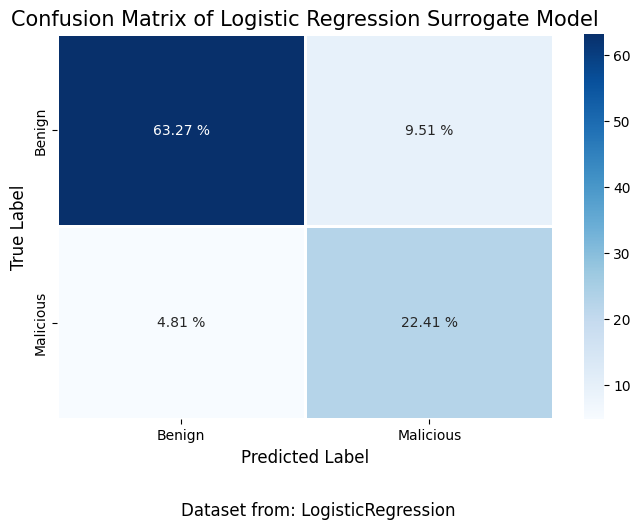

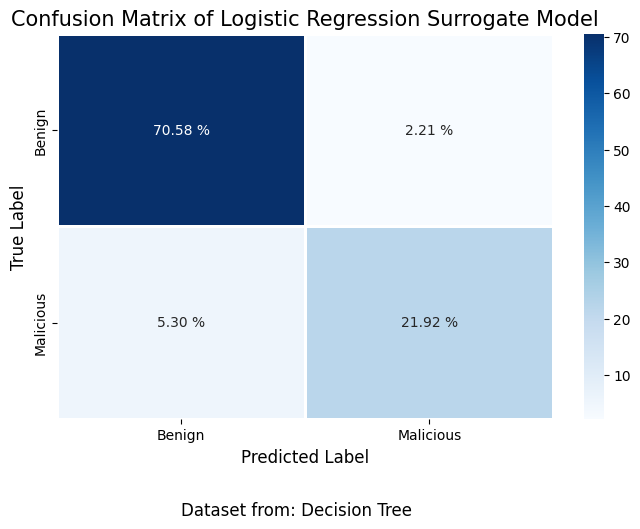

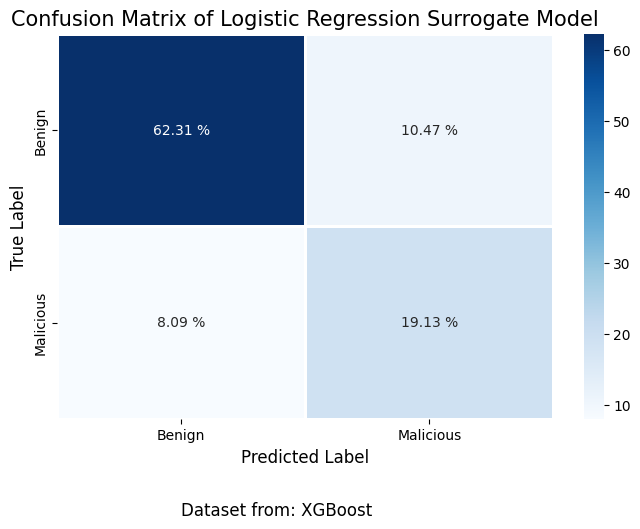

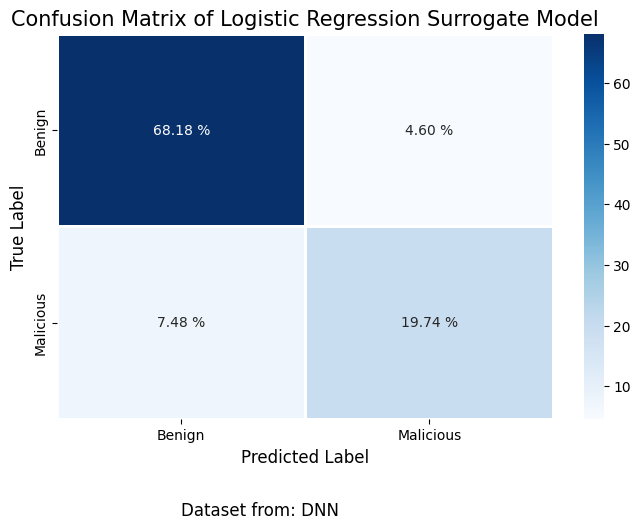

In [10]:

draw_confusion_matrix(y_test_lr_predicted, y_lrpred_from_lrdata, lr_model_from_lrdata, 'Logistic Regression', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_lrpred_from_dtdata, lr_model_from_dtdata, 'Logistic Regression', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_lrpred_from_xgbdata, lr_model_from_xgbdata, 'Logistic Regression', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_lrpred_from_dnndata, lr_model_from_dnndata, 'Logistic Regression', "DNN")

### DecisionTree

In [11]:
dt_model_from_lrdata, y_dtpred_from_lrdata = model_train('DecisionTree', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
dt_model_from_dtdata, y_dtpred_from_dtdata = model_train('DecisionTree', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
dt_model_from_xgbdata, y_dtpred_from_xgbdata = model_train('DecisionTree', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
dt_model_from_dnndata, y_dtpred_from_dnndata = model_train('DecisionTree', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')

DecisionTree
dataset_resource:  lr
Accuracy:  0.8615099583140343
Recall:  0.8615099583140343
Validation Accuracy:  0.8615099583140343
Validation Recall:  0.8615099583140343
Confusion matrix: 
 [[10994  1577]
 [  815  3886]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9310    0.8746    0.9019     12571
   Malicious     0.7113    0.8266    0.7647      4701

    accuracy                         0.8615     17272
   macro avg     0.8212    0.8506    0.8333     17272
weighted avg     0.8712    0.8615    0.8645     17272

DecisionTree
dataset_resource:  dt
Accuracy:  0.9787517369152385
Recall:  0.9787517369152385
Validation Accuracy:  0.9787517369152385
Validation Recall:  0.9787517369152385
Confusion matrix: 
 [[12304   267]
 [  100  4601]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9919    0.9788    0.9853     12571
   Malicious     0.9452    0.9787    0.9616      4701

    accur

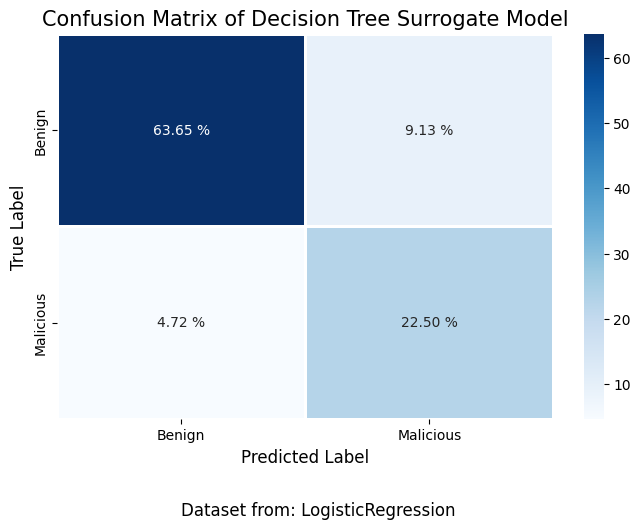

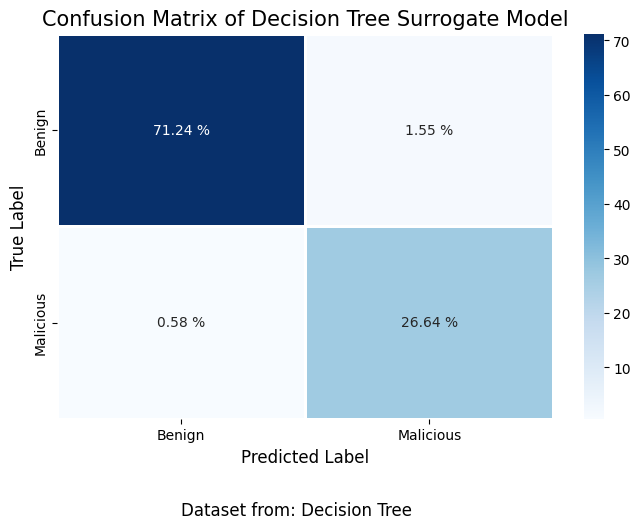

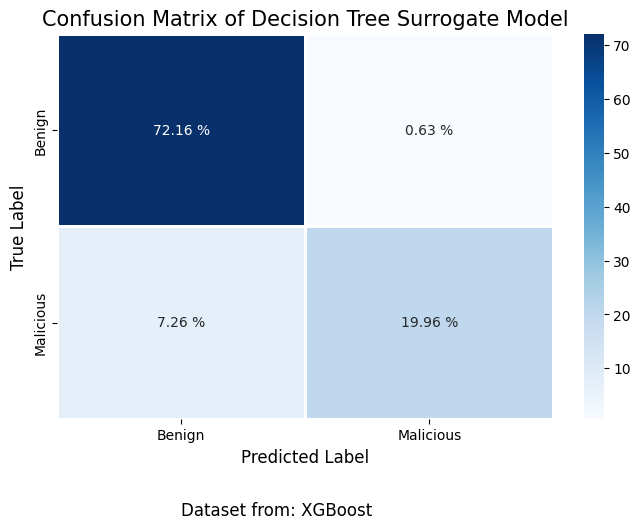

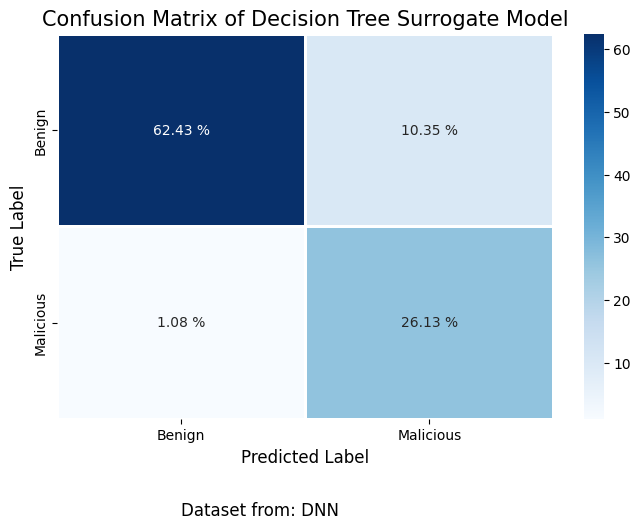

In [12]:
draw_confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata, dt_model_from_lrdata, 'Decision Tree', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata, dt_model_from_dtdata, 'Decision Tree', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_dtpred_from_xgbdata, dt_model_from_xgbdata, 'Decision Tree', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_dtpred_from_dnndata, dt_model_from_dnndata, 'Decision Tree', "DNN")

### XGBoost

In [13]:
X_train_xgb_predicted

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMin,FwdPktLenStd,BwdPktLenMax,BwdPktLenMean,BwdPktLenStd,...,FwdHeaderLen.1,SubflowFwdPkts,SubflowFwdByts,IdleStd,SubflowBwdPkts,SubflowBwdByts,InitBwdWinByts,FwdActDataPkts,ActiveStd,ActiveMax
0,1.140093e-03,0.000049,0.000020,0.000750,0.000020,0.000000,0.030507,0.056592,0.041214,0.042658,...,0.996404,0.000049,0.000750,0.0,0.000020,1.479636e-06,0.005341,0.000028,0.0,0.0
1,1.408334e-05,0.000005,0.000000,0.000011,0.000000,0.004076,0.000000,0.000000,0.000000,0.000000,...,0.996403,0.000005,0.000011,0.0,0.000000,0.000000e+00,0.000000,0.000006,0.0,0.0
2,3.887670e-04,0.000016,0.000008,0.000110,0.000008,0.020380,0.000000,0.011301,0.034044,0.000000,...,0.996403,0.000016,0.000110,0.0,0.000008,4.888909e-07,0.000000,0.000017,0.0,0.0
3,4.916671e-07,0.000000,0.000004,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.996403,0.000000,0.000000,0.0,0.000004,0.000000e+00,0.003952,0.000000,0.0,0.0
4,5.062921e-04,0.000005,0.000008,0.000073,0.000008,0.027174,0.000000,0.010103,0.030433,0.000000,...,0.996403,0.000005,0.000073,0.0,0.000008,4.370389e-07,0.000000,0.000006,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40295,2.595252e-04,0.000005,0.000008,0.000053,0.000008,0.019701,0.000000,0.003853,0.011606,0.000000,...,0.996403,0.000005,0.000053,0.0,0.000008,1.666674e-07,0.000000,0.000006,0.0,0.0
40296,5.929255e-04,0.000005,0.000008,0.000093,0.000008,0.034647,0.000000,0.011986,0.036107,0.000000,...,0.996403,0.000005,0.000093,0.0,0.000008,5.185207e-07,0.000000,0.000006,0.0,0.0
40297,1.841668e-06,0.000005,0.000008,0.000103,0.000008,0.038043,0.000000,0.015753,0.047455,0.000000,...,0.996403,0.000005,0.000103,0.0,0.000008,6.814843e-07,0.000000,0.000006,0.0,0.0
40298,5.851171e-04,0.000000,0.000004,0.000059,0.000004,0.043478,0.000000,0.010017,0.030175,0.000000,...,0.996403,0.000000,0.000059,0.0,0.000004,2.166676e-07,0.000000,0.000000,0.0,0.0


In [14]:
# print X_train_xgb_predicted[1] values
X_train_xgb_predicted.iloc[1]

FlowDuration      0.000014
TotFwdPkts        0.000005
TotBwdPkts        0.000000
TotLenFwdPkts     0.000011
TotLenBwdPkts     0.000000
FwdPktLenMin      0.004076
FwdPktLenStd      0.000000
BwdPktLenMax      0.000000
BwdPktLenMean     0.000000
BwdPktLenStd      0.000000
FlowByts/s        0.000003
FlowPkts/s        0.000394
FlowIATStd        0.000000
FwdIATTot         0.000014
FwdIATMean        0.000014
FwdIATMax         0.000014
BwdIATMean        0.000000
BwdIATStd         0.000000
BwdIATMax         0.000000
BwdIATMin         0.000000
BwdPSHFlags       0.000000
FwdHeaderLen      0.996403
BwdHeaderLen      0.995462
FwdPkts/s         0.000394
BwdPkts/s         0.000000
PktLenMax         0.000257
PktLenStd         0.000000
FINFlagCnt        0.000000
SYNFlagCnt        0.000000
ACKFlagCnt        1.000000
Down/UpRatio      0.000000
BwdSegSizeAvg     0.000000
FwdHeaderLen.1    0.996403
SubflowFwdPkts    0.000005
SubflowFwdByts    0.000011
IdleStd           0.000000
SubflowBwdPkts    0.000000
S

In [15]:
xgb_model_from_lrdata, y_xgbpred_from_lrdata = model_train('XGBoost', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
xgb_model_from_dtdata, y_xgbpred_from_dtdata = model_train('XGBoost', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
xgb_model_from_xgbdata, y_xgbpred_from_xgbdata = model_train('XGBoost', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
xgb_model_from_dnndata, y_xgbpred_from_dnndata = model_train('XGBoost', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')


XGBoost
dataset_resource:  lr
Accuracy:  0.86162575266327
Recall:  0.86162575266327
Validation Accuracy:  0.86162575266327
Validation Recall:  0.86162575266327
Confusion matrix: 
 [[11021  1550]
 [  840  3861]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9292    0.8767    0.9022     12571
   Malicious     0.7135    0.8213    0.7636      4701

    accuracy                         0.8616     17272
   macro avg     0.8214    0.8490    0.8329     17272
weighted avg     0.8705    0.8616    0.8645     17272

XGBoost
dataset_resource:  dt
Accuracy:  0.9816465956461324
Recall:  0.9816465956461324
Validation Accuracy:  0.9816465956461324
Validation Recall:  0.9816465956461324
Confusion matrix: 
 [[12311   260]
 [   57  4644]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9954    0.9793    0.9873     12571
   Malicious     0.9470    0.9879    0.9670      4701

    accuracy               

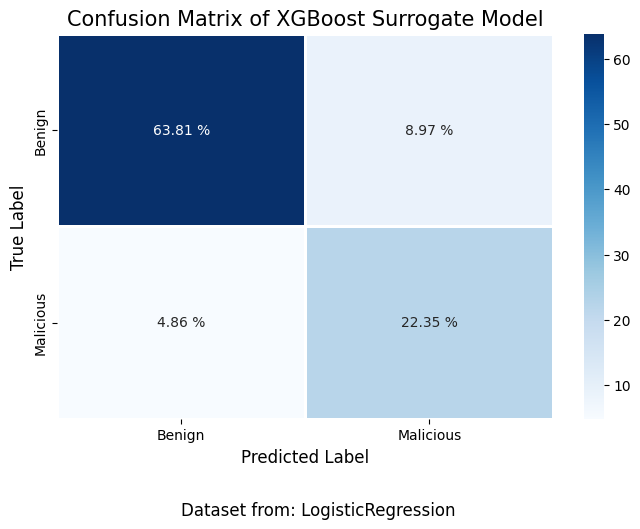

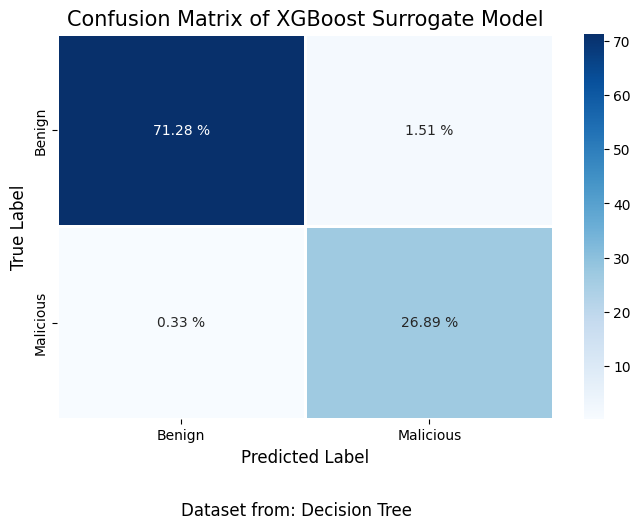

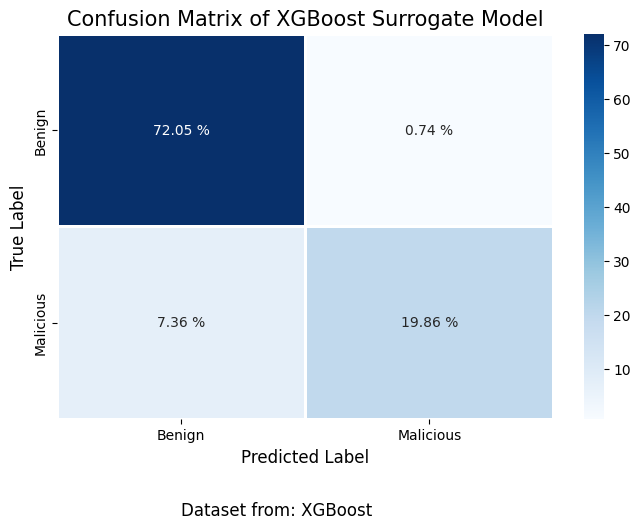

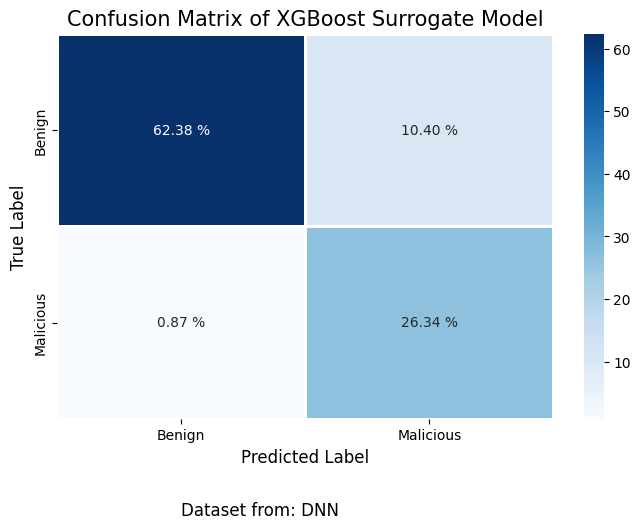

In [16]:
draw_confusion_matrix(y_test_lr_predicted, y_xgbpred_from_lrdata, xgb_model_from_lrdata, 'XGBoost', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_xgbpred_from_dtdata, xgb_model_from_dtdata, 'XGBoost', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_xgbpred_from_xgbdata, xgb_model_from_xgbdata, 'XGBoost', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_xgbpred_from_dnndata, xgb_model_from_dnndata, 'XGBoost', "DNN")

### Save Model

In [17]:
import torch
import pickle

# save model
# pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
# pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))

pickle.dump(lr_model_from_lrdata, open("../surrogate_model/ml_model/lr_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dtdata, open("../surrogate_model/ml_model/lr_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dnndata, open("../surrogate_model/ml_model/lr_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_xgbdata, open("../surrogate_model/ml_model/lr_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(dt_model_from_lrdata, open("../surrogate_model/ml_model/dt_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dtdata, open("../surrogate_model/ml_model/dt_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dnndata, open("../surrogate_model/ml_model/dt_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_xgbdata, open("../surrogate_model/ml_model/dt_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(xgb_model_from_lrdata, open("../surrogate_model/ml_model/xgb_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dtdata, open("../surrogate_model/ml_model/xgb_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dnndata, open("../surrogate_model/ml_model/xgb_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_xgbdata, open("../surrogate_model/ml_model/xgb_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

